In [1]:
# importing all the neccessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emoji
from IPython.core.interactiveshell import InteractiveShell
import re

# how many outputs do you want to display for each block ?
InteractiveShell.ast_node_interactivity = 'all'
# InteractiveShell.ast_node_interactivity = 'last'



In [2]:
#how many output summary row do you want to display?
pd.set_option('display.max_row',None)
# pd.set_option('display.max_row',100)

# how many output summary columns do you want to display?
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_columns',20)


In [3]:
bscs = pd.read_csv("C:\\Users\\Waqas\\OneDrive\\Dataset\\WhatsApp Chat with BSCS.csv",
                     delimiter = '\t',
                     header = None,
                     names =['text'])

In [4]:
bscs.head(10)

,text
0,"11/07/2020, 10:43 pm - Messages and calls are ..."
1,"15/07/2020, 8:51 pm - Syed Muhammad Ali Abbas ..."
2,"16/07/2020, 2:39 pm - You added Senior ubit"
3,"23/07/2020, 5:38 pm - IAMWaqasAhmed: Allow kar..."
4,"23/07/2020, 7:53 pm - Syed Muhammad Ali Abbas ..."
5,"24/07/2020, 1:04 am - Ammar Sohail UBIT: Depar..."
6,"24/07/2020, 1:04 am - Manav Lala UBIT: DCS-UBIT"
7,"24/07/2020, 1:07 am - Ammar Sohail UBIT: San Q"
8,"24/07/2020, 12:50 pm - Shaban Alam UBIT: <Medi..."
9,"24/07/2020, 12:52 pm - Sheik Raess UBIT: 👍👍👍"


In [5]:
# Extract DateTime
bscs[['DataTime_Str','text_2']]  = bscs['text'].str.split(" - ",1,expand=True)

In [6]:
bscs.head(10)

,text,DataTime_Str,text_2
0,"11/07/2020, 10:43 pm - Messages and calls are ...","11/07/2020, 10:43 pm",Messages and calls are end-to-end encrypted. N...
1,"15/07/2020, 8:51 pm - Syed Muhammad Ali Abbas ...","15/07/2020, 8:51 pm",Syed Muhammad Ali Abbas UBIT: <Media omitted>
2,"16/07/2020, 2:39 pm - You added Senior ubit","16/07/2020, 2:39 pm",You added Senior ubit
3,"23/07/2020, 5:38 pm - IAMWaqasAhmed: Allow kar...","23/07/2020, 5:38 pm",IAMWaqasAhmed: Allow kardoo sub
4,"23/07/2020, 7:53 pm - Syed Muhammad Ali Abbas ...","23/07/2020, 7:53 pm",Syed Muhammad Ali Abbas UBIT: <Media omitted>
5,"24/07/2020, 1:04 am - Ammar Sohail UBIT: Depar...","24/07/2020, 1:04 am",Ammar Sohail UBIT: Department name? Computer s...
6,"24/07/2020, 1:04 am - Manav Lala UBIT: DCS-UBIT","24/07/2020, 1:04 am",Manav Lala UBIT: DCS-UBIT
7,"24/07/2020, 1:07 am - Ammar Sohail UBIT: San Q","24/07/2020, 1:07 am",Ammar Sohail UBIT: San Q
8,"24/07/2020, 12:50 pm - Shaban Alam UBIT: <Medi...","24/07/2020, 12:50 pm",Shaban Alam UBIT: <Media omitted>
9,"24/07/2020, 12:52 pm - Sheik Raess UBIT: 👍👍👍","24/07/2020, 12:52 pm",Sheik Raess UBIT: 👍👍👍


In [7]:
bscs['DateTime'] = pd.to_datetime(bscs['DataTime_Str'],format = "%d/%m/%Y, %I:%M %p",errors='coerce')

In [8]:
bscs.head()

,text,DataTime_Str,text_2,DateTime
0,"11/07/2020, 10:43 pm - Messages and calls are ...","11/07/2020, 10:43 pm",Messages and calls are end-to-end encrypted. N...,2020-07-11 22:43:00
1,"15/07/2020, 8:51 pm - Syed Muhammad Ali Abbas ...","15/07/2020, 8:51 pm",Syed Muhammad Ali Abbas UBIT: <Media omitted>,2020-07-15 20:51:00
2,"16/07/2020, 2:39 pm - You added Senior ubit","16/07/2020, 2:39 pm",You added Senior ubit,2020-07-16 14:39:00
3,"23/07/2020, 5:38 pm - IAMWaqasAhmed: Allow kar...","23/07/2020, 5:38 pm",IAMWaqasAhmed: Allow kardoo sub,2020-07-23 17:38:00
4,"23/07/2020, 7:53 pm - Syed Muhammad Ali Abbas ...","23/07/2020, 7:53 pm",Syed Muhammad Ali Abbas UBIT: <Media omitted>,2020-07-23 19:53:00


In [9]:
# bscs.loc[:,'text_message'].sum()
bscs = bscs.dropna(subset=['DateTime'])
bscs = bscs.drop(columns= ["DataTime_Str"])

In [10]:
bscs.head(10)

,text,text_2,DateTime
0,"11/07/2020, 10:43 pm - Messages and calls are ...",Messages and calls are end-to-end encrypted. N...,2020-07-11 22:43:00
1,"15/07/2020, 8:51 pm - Syed Muhammad Ali Abbas ...",Syed Muhammad Ali Abbas UBIT: <Media omitted>,2020-07-15 20:51:00
2,"16/07/2020, 2:39 pm - You added Senior ubit",You added Senior ubit,2020-07-16 14:39:00
3,"23/07/2020, 5:38 pm - IAMWaqasAhmed: Allow kar...",IAMWaqasAhmed: Allow kardoo sub,2020-07-23 17:38:00
4,"23/07/2020, 7:53 pm - Syed Muhammad Ali Abbas ...",Syed Muhammad Ali Abbas UBIT: <Media omitted>,2020-07-23 19:53:00
5,"24/07/2020, 1:04 am - Ammar Sohail UBIT: Depar...",Ammar Sohail UBIT: Department name? Computer s...,2020-07-24 01:04:00
6,"24/07/2020, 1:04 am - Manav Lala UBIT: DCS-UBIT",Manav Lala UBIT: DCS-UBIT,2020-07-24 01:04:00
7,"24/07/2020, 1:07 am - Ammar Sohail UBIT: San Q",Ammar Sohail UBIT: San Q,2020-07-24 01:07:00
8,"24/07/2020, 12:50 pm - Shaban Alam UBIT: <Medi...",Shaban Alam UBIT: <Media omitted>,2020-07-24 12:50:00
9,"24/07/2020, 12:52 pm - Sheik Raess UBIT: 👍👍👍",Sheik Raess UBIT: 👍👍👍,2020-07-24 12:52:00


In [11]:
# Extract Sender and message
bscs[['sender','text_message']] = bscs['text_2'].str.split(': ',1,expand=True)

In [12]:
bscs = bscs.dropna(subset=['text_message'])
bscs = bscs.drop(columns=['text','text_2'])
bscs['First_Name'] = bscs['sender'].str.split(' ',expand=True)[0]
bscs['last_name'] = bscs['sender'].str.split(' ',expand=True)[1]
bscs['sender'] = bscs['First_Name'].where(bscs['last_name'].isnull(),bscs['First_Name']+" "+
                                                     bscs['last_name'])

In [13]:
bscs = bscs.drop(columns=['First_Name','last_name'])

In [17]:
pd.DataFrame(bscs.info())
bscs.head(10)
bscs.tail(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258 entries, 1 to 3616
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      3258 non-null   datetime64[ns]
 1   sender        3258 non-null   object        
 2   text_message  3258 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 261.8+ KB


""


,DateTime,sender,text_message
1,2020-07-15 20:51:00,Syed Muhammad,<Media omitted>
3,2020-07-23 17:38:00,IAMWaqasAhmed,Allow kardoo sub
4,2020-07-23 19:53:00,Syed Muhammad,<Media omitted>
5,2020-07-24 01:04:00,Ammar Sohail,Department name? Computer science ya ubit?
6,2020-07-24 01:04:00,Manav Lala,DCS-UBIT
7,2020-07-24 01:07:00,Ammar Sohail,San Q
8,2020-07-24 12:50:00,Shaban Alam,<Media omitted>
9,2020-07-24 12:52:00,Sheik Raess,👍👍👍
10,2020-07-24 14:08:00,Nameer Waqas,👍🏻
11,2020-07-24 14:18:00,+92 332,👍🏻


,DateTime,sender,text_message
3597,2020-10-27 19:12:00,IAMWaqasAhmed,https://teams.microsoft.com/l/meetup-join/19%3...
3598,2020-10-27 19:20:00,Touseef Haider,<Media omitted>
3599,2020-10-27 19:22:00,IAMWaqasAhmed,join here
3600,2020-10-27 19:27:00,Yahya Ubit,Waqas gand maralo bhrwe
3601,2020-10-27 19:28:00,Yahya Ubit,Miss meri marahy hain
3602,2020-10-27 19:32:00,Shaban Alam,https://fac.ksu.edu.sa/sites/default/files/ind...
3603,2020-10-27 19:32:00,Shaban Alam,Simulation Modelling text book
3604,2020-10-28 10:49:00,Munawar Balti,OS kis time conduct hu gi time bataya
3605,2020-10-28 14:07:00,Touseef Haider,Class kitne bje hai?
3606,2020-10-28 14:09:00,Suhaib UBIT,Choro


In [18]:
# Day,week classified
bscs['day_of_week'] = bscs['DateTime'].dt.dayofweek + 1
bscs['hour_of_day'] = bscs['DateTime'].dt.hour
heatmap_data = bscs.groupby(['day_of_week','hour_of_day']).size()

Text(0.5, 0, 'Hours of Day')

Text(0, 0.5, 'Day of Week')

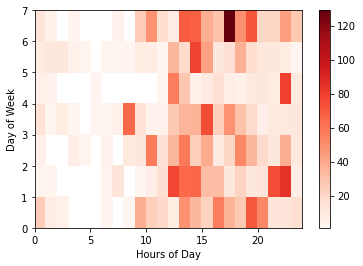

In [19]:
# heatmap data
heatmap_data = heatmap_data.unstack()
#Create Heatmap
plt.pcolor(heatmap_data,cmap='Reds')
plt.xlabel('Hours of Day')
plt.ylabel('Day of Week')
plt.colorbar()
plt.show()

In [20]:
# sording sender messages
sender_count_series = bscs.groupby(['sender']).size().sort_values(ascending=False)
sender_count_df = pd.DataFrame(sender_count_series)
sender_count_df

,0
sender,
Ammar Sohail,496
IAMWaqasAhmed,432
Mustafa Burni,282
Yahya Ubit,253
Muhammad Aqib,208
Ebad Shezad,143
Syed Muhammad,107
Sarfraz Rasheed,106
Talha Irshad,100


<Figure size 1080x360 with 0 Axes>

<BarContainer object of 47 artists>

Text(0.5, 0, 'Sender')

Text(0, 0.5, 'Message Count')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 <a list of 47 Text major ticklabel objects>)

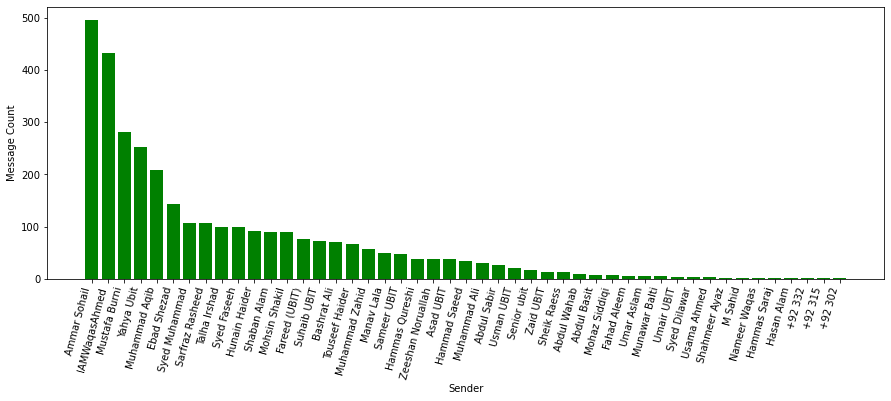

In [21]:
sender_count_df = sender_count_df.reset_index()
sender_count_df.columns = ['sender','count']
plt.figure(figsize=(15,5))
plt.bar(sender_count_df['sender'],sender_count_df['count'],color='green')
plt.xlabel('Sender')
plt.ylabel('Message Count')
plt.xticks(rotation = 75,ha = 'right')
plt.show()

In [22]:
data_texts = bscs[~bscs['text_message'].str.contains('omitted')]
words = pd.DataFrame(columns=['sender','words'])

In [23]:
# loop through all message in the DataFrame
for sender,message in zip(data_texts.sender,data_texts.text_message):
    # splitout each word in each message
    message_split = message.split()
    for word in message_split:
        # add each word to DataFrame
        words = words.append({'sender':sender,'words':word.lower()},ignore_index=True)

In [24]:
# Remove punctuation from the start and end of words 
words['words'] = words['words'].str.replace("(^\W)|(\W$)",'' )
# create list of non-words that we don't care about
non_words = ['the','to','a','i','you','it','and','for','be','that','in','of','have','on','at','is','as','or','we',
            'if','so','']
words_filtered = words[~words['words'].isin(non_words)]
# create word counts series as DataFrame 
word_count_total_series = words_filtered.groupby(['words']).size().sort_values(ascending=False)
# create word counts as a DataFrame
word_count_total = pd.DataFrame(word_count_total_series)
# reset index in order to name columns correctly 
word_count_total = word_count_total.reset_index()
word_count_total.columns = ['words','count']
#display to 10 words use
word_count_total.head(15)

,words,count
0,hai,269
1,he,206
2,bhai,203
3,ka,181
4,k,154
5,ki,143
6,sir,123
7,ko,102
8,assignment,101
9,se,101


In [25]:
# find where a word come in combined countt
word_count_total[word_count_total['words'].isin(['training','sir','sorry','beers','fitness','pub','quiz','happy','birthday','hockey'])]


,words,count
6,sir,123
225,sorry,9
623,quiz,3


In [26]:
# create word coutns by sender as as series
word_count_by_sender_series = words_filtered.groupby(['sender','words']).size().sort_values(ascending=False)




In [27]:
# create word counts by sender series as a DataFrame
word_count_by_sender = pd.DataFrame(word_count_by_sender_series)


In [28]:

# Reset index in order to name columns correctly
word_count_by_sender = word_count_by_sender.reset_index()
word_count_by_sender.columns = ['sender','words','count']



<BarContainer object of 20 artists>

Text(0.5, 0, 'unique count')

Text(0, 0.5, 'word')

Text(0.5, 1.0, 'Waqas Ahmed(my) words usage')

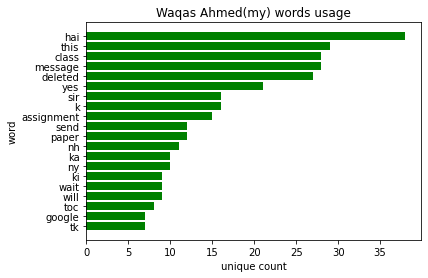

In [29]:
# plot bar chart with top n all word used by me
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender'] == 'IAMWaqasAhmed'].head(20).sort_values(by='count',
                                                                                                                         ascending=True)

plt.barh(word_count_by_sender_top_n['words'],word_count_by_sender_top_n['count'],color = 'green')
plt.xlabel('unique count')
plt.ylabel('word')
plt.title('Waqas Ahmed(my) words usage')
plt.show()

<BarContainer object of 20 artists>

Text(0.5, 0, 'unique count')

Text(0, 0.5, 'word')

Text(0.5, 1.0, 'Ammar Bahi words usage')

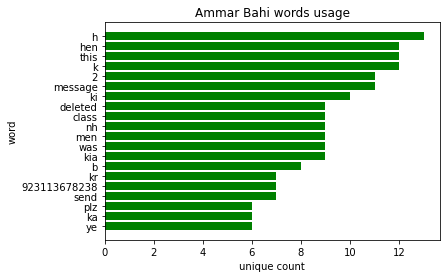

In [30]:
# plot bar chart with top n all word used by me
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender'] == 'Ammar Sohail'].head(20).sort_values(by='count',
                                                                                                                         ascending=True)
plt.barh(word_count_by_sender_top_n['words'],word_count_by_sender_top_n['count'],color = 'green')
plt.xlabel('unique count')
plt.ylabel('word')
plt.title('Ammar Bahi words usage')
plt.show()

In [32]:
# Clear DataFrame to creat words used
emojis = pd.DataFrame(columns=['sender','emoji','datatime'])
emojis


,sender,emoji,datatime


In [33]:
# loop through all message in the DataFrame
for sender,message,datetime in zip(bscs.sender,bscs.text_message,bscs.DateTime):
    message_split = list(message)
    # split out each word in each message 
    
    # loop through each word in split message
    for character in message_split:
        # if th word in an emoji
        if character in emoji.UNICODE_EMOJI and character != "\U0001f3fc":
            
            # add eac emoji to Dataframe 
            emojis = emojis.append({'sender':sender,'emoji':character,'DateTime':datetime},ignore_index=True)
            
# display top n most popular emojis
emojis.groupby(['emoji']).size().sort_values(ascending=False).head(10)

emoji
😂    105
👍     70
🙄     35
🏻     28
♂     24
🤣     19
🤦     18
😑     16
😝     14
😌     13
dtype: int64